In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [2]:
plant_dataset=pd.read_csv('/content/plant_disease_dataset.csv')

In [3]:
plant_dataset.head()

,temperature,humidity,rainfall,soil_pH,disease_present
0,27.483571,33.215053,0.572758,4.975875,1
1,24.308678,36.945005,42.522346,8.165266,0
2,28.238443,34.026189,16.095303,6.316734,1
3,32.615149,41.104180,20.311015,6.164949,0
4,23.829233,51.971785,11.851323,8.482468,0


In [4]:
plant_dataset.describe()

,temperature,humidity,rainfall,soil_pH,disease_present
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,25.612191,62.119300,9.807522,6.245855,0.241000
std,5.813841,22.679977,9.852130,1.302465,0.427712
min,5.387999,6.244209,0.000055,4.000075,0.000000
25%,21.815610,40.772925,2.812822,5.122970,0.000000
50%,25.293238,72.211752,6.864898,6.232188,0.000000
75%,28.916048,81.032999,13.442871,7.386377,0.000000
max,56.686495,102.395421,84.654161,8.499875,1.000000


In [6]:
plant_dataset['disease_present'].value_counts()

,count
disease_present,
0,7590
1,2410


0 --> no disease

1 --> disease present

In [7]:
X=plant_dataset.drop(columns='disease_present',axis=1)
Y=plant_dataset['disease_present']

In [8]:
print(X)
print(Y)

      temperature   humidity   rainfall   soil_pH
0       27.483571  33.215053   0.572758  4.975875
1       24.308678  36.945005  42.522346  8.165266
2       28.238443  34.026189  16.095303  6.316734
3       32.615149  41.104180  20.311015  6.164949
4       23.829233  51.971785  11.851323  8.482468
...           ...        ...        ...       ...
9995    31.505510  81.939137  22.406822  5.862952
9996    15.008275  86.886833  10.503881  4.070539
9997    21.473416  81.891770  13.426869  7.101583
9998    27.478828  88.567649   9.719659  7.732620
9999    28.221942  71.900401   4.886391  4.383536

[10000 rows x 4 columns]
0       1
1       0
2       1
3       0
4       0
       ..
9995    1
9996    0
9997    0
9998    0
9999    0
Name: disease_present, Length: 10000, dtype: int64


In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=2)

In [10]:
print(X.shape, X_train.shape, X_test.shape)

(10000, 4) (9000, 4) (1000, 4)


In [11]:
model=LogisticRegression()

In [12]:
model.fit(X_train,Y_train)

LogisticRegression()

In [14]:
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction, Y_train)

In [15]:
print('Accuracy on training data is :', training_data_accuracy)

Accuracy on training data is : 0.767


In [16]:
X_test_prediction=model.predict(X_test)
testin_data__accuracy=accuracy_score(X_test_prediction, Y_test)

In [17]:
print('Accuracy on testing data : ',testin_data__accuracy)

Accuracy on testing data :  0.774


Making a predictive model

In [22]:
input_data=(27.712800217929825,48.18594618343214,3.063415847672062,4.42677861557573)

#converting input data into a numpy array
input_data_as_array=np.asarray(input_data)

#reshaping the input numpy as array
input_data_reshape=input_data_as_array.reshape(1,-1)

prediction=model.predict(input_data_reshape)

if(prediction[0]==0):
  print("The Plant doesnot have any disease")
else:
  print('The plant has disease')

The Plant doesnot have any disease


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


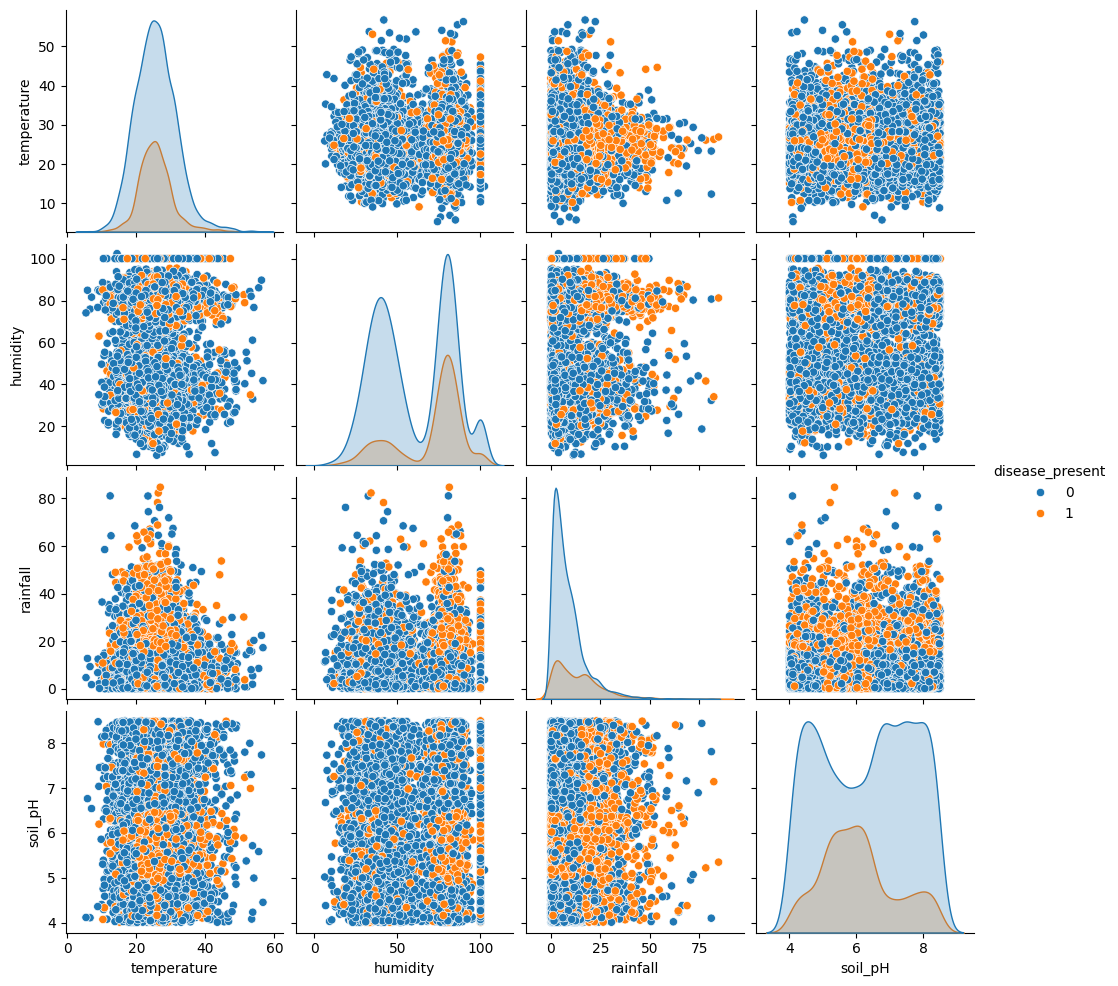

In [24]:
import seaborn as sns
sns.pairplot(plant_dataset,hue='disease_present')